#### Notebook config

In [1]:
# %load fwipy_config.py 

# -----------------------------------------------------------------------------
# Load default modules defined in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
from fwipy import *


# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook


# -----------------------------------------------------------------------------
# Configure matplotlib
# -----------------------------------------------------------------------------
# SET DEFAULT backend:
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# OTHER OPTIONS: %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# NOTE: ALREADY SET IN fwi.plot.specific.mpl.Fig.__init__
# SET DEFAULT style:
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'fwipy'])
# OTHER OPTIONS: print(plt.style.available)


# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers etc. 
# and load the log_lvl function
from fwipy.config.logging import *
# -----------------------------------------------------------------------------
# SET DEFAULT level of log-messages to display
log_lvl(40)
# OTHER OPTIONS: TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50 respectively
# (in order of increasing importance/dicreasing ver.shellity)


# -----------------------------------------------------------------------------
# Other notebook's configuration
# -----------------------------------------------------------------------------
# Autocompleting
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [2]:
path_eph = '/home/kmc3817/projects_rds_my_ephemeral/ch_pvz/'
path_fig = '/home/kmc3817/a_projects_dd1/01_thesis/figures/ch_pvz/'

In [3]:
from importlib import reload

In [4]:
import fwilight.fwi
from fwilight.fwi import *
reload(fwilight.fwi)

<module 'fwilight.fwi' from '/home/kmc3817/software/fwilight/fwilight/fwi.py'>

### Code to port

#### Alg. 
Plotting synthetic run.

In [ ]:
      # if proj.problem == 'synthetic' and plot:
      #   figure(15,5)
      #   plt.subplot(121)
      #   proj.o.syn.plot(overwrite_mmp=1)
      #   proj.reinit()
      #   its = sorted(proj.o.fw.it[1][1].keys())
      #   it = its[6]
      #   plt.subplot(122)
      #   proj.i.tvp.plot(cmap='Greys', cbar=0, aspect='equal', overwrite_mmp=1)
      #   proj.o.fw.it[1][1][it].plot(cmap='RdBu', overwrite_mmp=1, alpha=0.4)

#### Alg. 
Regular geometry through SEGY.

In [89]:
x1 = 0
x2 = 2000
y1 = 0
y2 = 0
z1 = 0
z2 = 1000

In [87]:
# data sampling
dt = 0.001 # s
ns = 1000

rdx = 100 # m
sdx = 500
sdy = 

In [85]:
class Sgy(SgyFile):
    def create(self, array, dt, **kwargs):
        from fullwavepy.ioapi.segy import array2sgy
        return array2sgy(self.fname, array, dt, **kwargs)
f = Sgy('tmp.sgy', './')
data = np.random.rand(10,100)

f.create(data, dt)
# a = A3d(f.read())

In [82]:
f.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00794612 s, 403 kB/s

10 traces:
tracl    1 10 (1 - 10)
tracr    1 10 (1 - 10)
fldr     1 10 (1 - 10)
tracf    1
ep       1
cdp      1 10 (1 - 10)
cdpt     1
trid     1
nvs      1
nhs      1
duse     1
scalel   1
scalco   1
sx       0 9 (0 - 9)
gx       0 9 (0 - 9)
counit   1
ns       100
dt       1000
gain     3

Shot coordinate limits:
	North(0,0) South(0,0) East(9,0) West(0,0)

Receiver coordinate limits:
	North(0,0) South(0,0) East(9,0) West(0,0)

Midpoint coordinate limits:
	North(0,0) South(0,0) East(9,0) West(0,0)



#### Alg. 
Setting header values.

In [ ]:
from fullwavepy.ioapi.generic import save_txt
prefix = 'sx'
file_txt = prefix + '.txt'
file_bin = prefix + '.bin'
save_txt(file_txt, data)
o, e = bash('a2b < {} n1=1 > {}'.format(file_txt, file_bin))

In [ ]:
gelev    -1300
sdepth   1300
scalel   1
scalco   1
sx       2500
gx       3000

In [81]:
!sushw

 									
 SUSHW - Set one or more Header Words using trace number, mod and	
	 integer divide to compute the header word values or input	
	 the header word values from a file				
 									
 ... compute header fields						
   sushw <stdin >stdout key=cdp,.. a=0,..  b=0,.. c=0,.. d=0,.. j=..,..
 									
 ... or read headers from a binary file				
   sushw <stdin > stdout  key=key1,..    infile=binary_file		
 									
 									
 Required Parameters for setting headers from infile:			
 key=key1,key2 ... is the list of header fields as they appear in infile
 infile= 	binary file of values for field specified by		
 		key1,key2,...						
 									
 Optional parameters ():						
 key=cdp,...			header key word(s) to set 		
 a=0,...			value(s) on first trace			
 b=0,...			increment(s) within group		
 c=0,...			group increment(s)	 		
 d=0,...			trace number shift(s)			
 j=ULONG_MAX,ULONG_MAX,...	number of elements in group		
 									
 Notes:								
 Fields that are getparred must have t

In [80]:
f.read_header()

,cdp,cdpt,counit,dt,duse,ep,fldr,gain,gx,nhs,ns,nvs,scalco,scalel,sx,tracf,tracl,tracr,trid
0,1,1,1,1000,1,1,1,3,0,1,100,1,1,1,0,1,1,1,1
1,2,1,1,1000,1,1,2,3,1,1,100,1,1,1,1,1,2,2,1
2,3,1,1,1000,1,1,3,3,2,1,100,1,1,1,2,1,3,3,1
3,4,1,1,1000,1,1,4,3,3,1,100,1,1,1,3,1,4,4,1
4,5,1,1,1000,1,1,5,3,4,1,100,1,1,1,4,1,5,5,1
5,6,1,1,1000,1,1,6,3,5,1,100,1,1,1,5,1,6,6,1
6,7,1,1,1000,1,1,7,3,6,1,100,1,1,1,6,1,7,7,1
7,8,1,1,1000,1,1,8,3,7,1,100,1,1,1,7,1,8,8,1
8,9,1,1,1000,1,1,9,3,8,1,100,1,1,1,8,1,9,9,1
9,10,1,1,1000,1,1,10,3,9,1,100,1,1,1,9,1,10,10,1


#### Alg. 
Plotting wiggles.

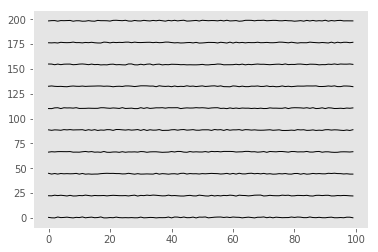

In [77]:
from fullwavepy.plot.plt2d import plot_wiggl
plot_wiggl(a[:,0,:], gap=1, c='k')

In [70]:
a.extent

[[0, 9], [0, 0], [0, 99]]

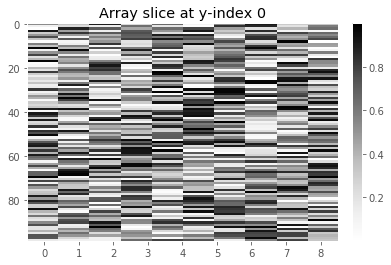

In [69]:
a.plot(0)

#### Agl.
Added handling gradients.

In [5]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo')
kw_fs  = None
kw_rsg = dict(kind='sine', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[91,1,51], rec=[111,1,51])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.0001)
f = FlowInvSyn('fis01', './')
f.run([0], kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv)

Step 000: Initialising synthetic and inversion projects.
CPU times: user 84 ms, sys: 20 ms, total: 104 ms
Wall time: 161 ms


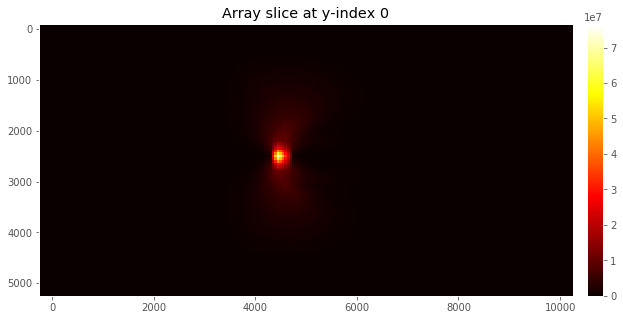

In [9]:
figure(15,5)
f.inv.o.prec.it[1].plot(aspect='equal')

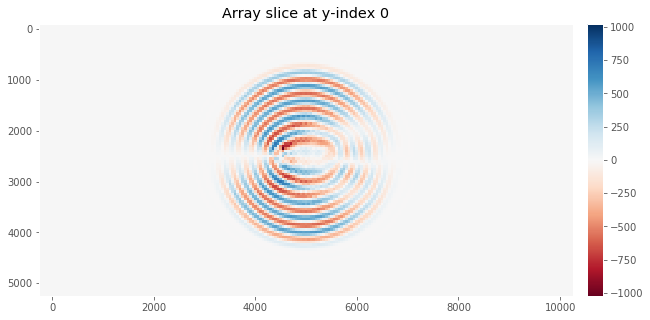

In [11]:
figure(15,5)
f.inv.o.grad.it[1].plot(aspect='equal')

# Numerical experiments

#### Fig.

In [36]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,201), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo', value=vp)
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[101,1,81], rec=[101,1,121])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.1)
f = FlowInvSyn('fis01', './')
f.run(range(6), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv, aspect='equal')
fp =f

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
CPU times: user 88 ms, sys: 100 ms, total: 188 ms
Wall time: 7.66 s


In [41]:
1.1*2

2.2

(7000.0, 3000.0)

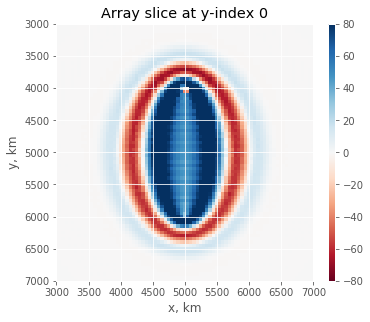

In [50]:
figure(5,5)
fp.inv.o.rawgrad.it[1].plot(aspect='equal',clip=80)
plt.grid()
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.xlim(3e3,7e3)
plt.ylim(7e3,3e3)

(7000.0, 3000.0)

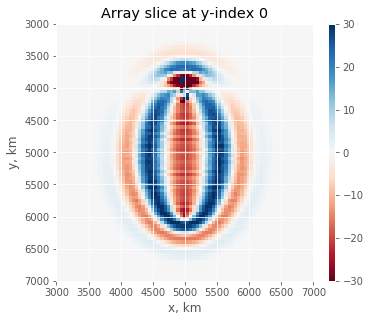

In [49]:
figure(5,5)
fv.inv.o.rawgrad.it[1].plot(aspect='equal',clip=30)
plt.grid()
plt.xlabel('x, km')
plt.ylabel('y, km')
plt.xlim(3e3,7e3)
plt.ylim(7e3,3e3)

(8000.0, 2000.0)

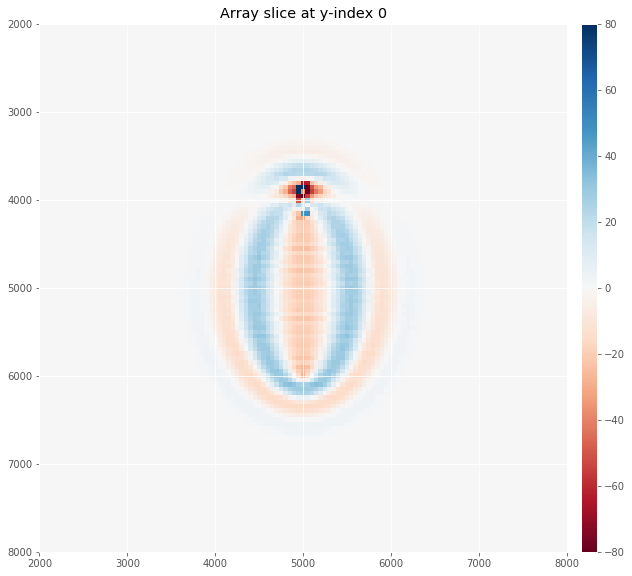

In [40]:
figure(10,10)
fv.inv.o.rawgrad.it[1].plot(aspect='equal',clip=80)
plt.grid()
plt.xlim(2e3,8e3)
plt.ylim(8e3,2e3)

In [25]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,201), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo')
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[101,1,81], rec=[101,1,121])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.1)
f = FlowInvSyn('is02', './')
f.run([0,1], kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv, aspect='equal')
f.syn.i.sgn.time_integrate()
f.run(range(2,6), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv)
fv = f

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
CPU times: user 108 ms, sys: 116 ms, total: 224 ms
Wall time: 7.74 s


#### Fig.
Gradient for the monopole source and receiver, 2d homogeneous model of 2 km/s. Starting model 10% faster than the true one. Ricker source wavelet with 4 Hz peak frequency. Domain of 1 x 1 km in space sampled at 50 m and 2s in time sampled at 2000 time steps. 

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
Step 006: Plotting output of inversion.
CPU times: user 288 ms, sys: 184 ms, total: 472 ms
Wall time: 8.94 s


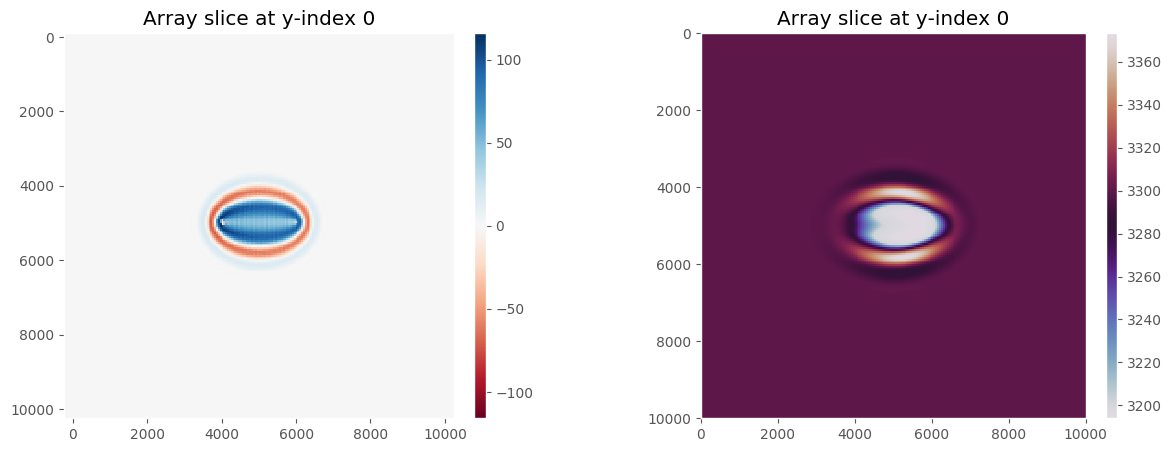

In [6]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,201), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo', value=vp)
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[81,1,101], rec=[121,1,101])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.1)
f = FlowInvSyn('fis01', './')
f.run(range(7), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv, aspect='equal')

In [6]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,201), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo', value=vp)
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[81,1,101], rec=[121,1,101])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.1)
f = FlowInvSyn('fis01', './')
f.run(range(6), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv, aspect='equal')

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
CPU times: user 80 ms, sys: 88 ms, total: 168 ms
Wall time: 7.61 s


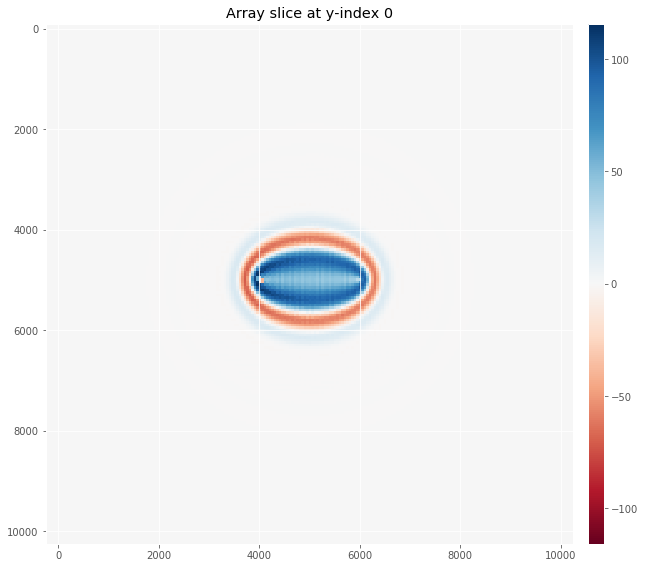

In [17]:
figure(10,10)
f.inv.o.rawgrad.it[1].plot(aspect='equal')
plt.grid()

In [9]:
1.1 * 3000

3300.0000000000005

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
Step 006: Plotting output of inversion.
CPU times: user 192 ms, sys: 156 ms, total: 348 ms
Wall time: 8.07 s


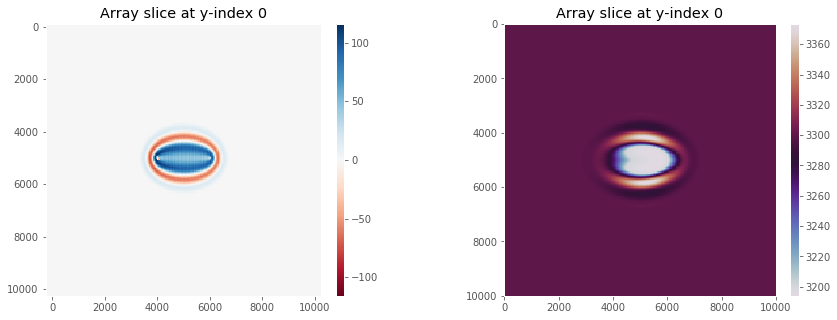

In [42]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,201), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo')
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[81,1,101], rec=[121,1,101])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.1)
f = FlowInvSyn('fis01', './')
f.run(range(7), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv, aspect='equal')

Synthetic is faster as expected.

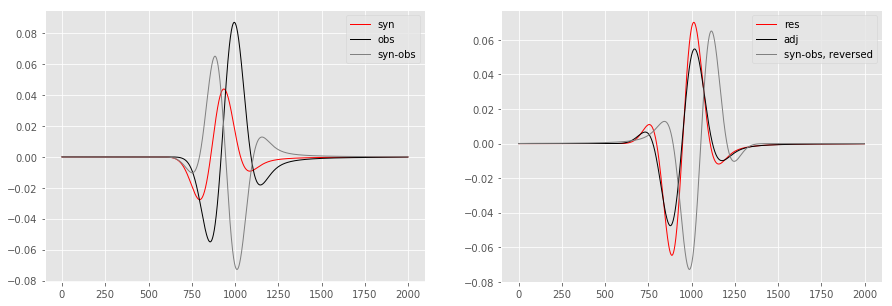

In [54]:
# code 
figure(15,5)
plt.subplot(121)
a = read_ttr('fis01inv/out/fis01inv-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr')
plt.plot(a[0,0,:], label='syn', c='r')
plt.plot(a[1,0,:], label='obs', c='k')
plt.plot(a[2,0,:], label='syn-obs', c='Grey')
plt.legend()
plt.grid()

plt.subplot(122)
res = read_ttr('fis01inv/out/fis01inv-SLAVES_DUMPRESIDS-csref00001-iter00001fwd2.ttr')[0,0,:]
adj = read_ttr('fis01inv/out/fis01inv-SLAVES_DUMPADJOINT-csref00001-iter00001.ttr')[0,0,:]
plt.plot(res, label='res', c='r')
plt.plot(adj, label='adj', c='k')
# plt.plot(a[2,0,:], label='diff', c='Grey')
plt.plot(a[2,0,:][::-1], label='syn-obs, reversed', c='Grey')
plt.legend()
plt.grid()

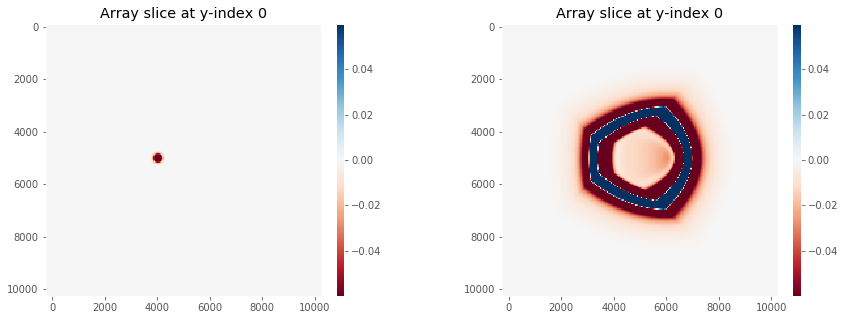

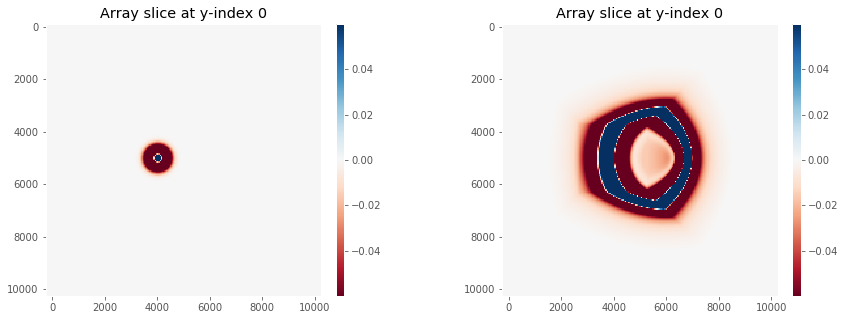

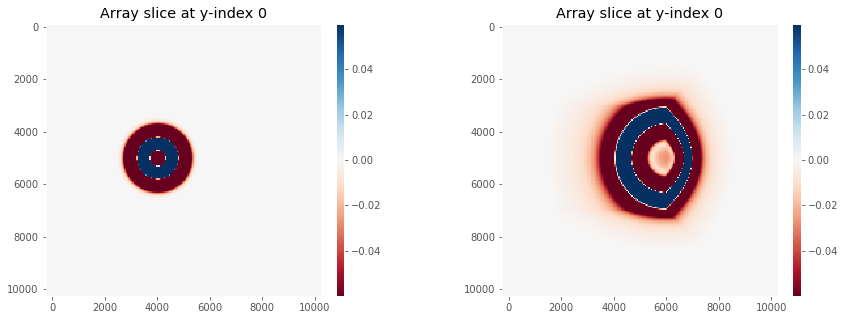

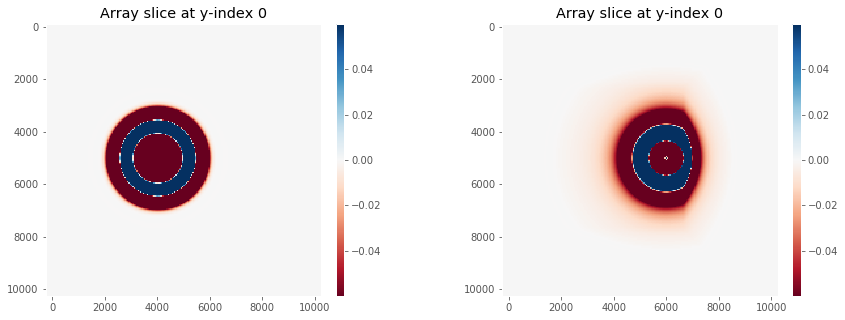

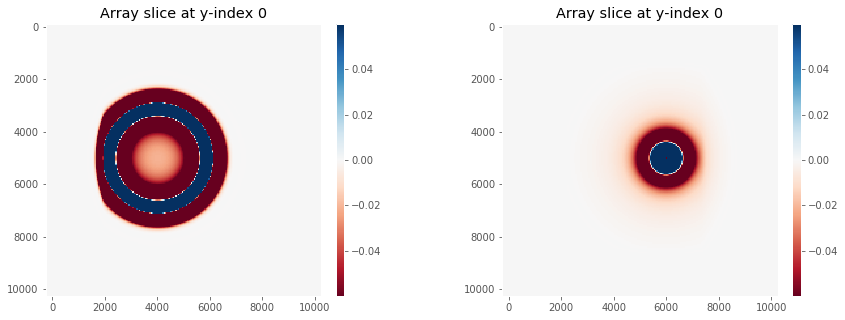

In [55]:
# code 
for i in range(100, 1000, 200):
    figure(15,5)
    plt.subplot(121)
    f.inv.o.fw.it[1][1][i].plot(overwrite=1, overwrite_mmp=1)
    plt.subplot(122)
    f.inv.o.bw.it[1][1][i].plot(overwrite=1, overwrite_mmp=1)    

#### Fig.
Gradient for a vertical dipole source and a monopole receiver. Note the reduced sensitivity to the structure along the direction orthogonal to the dipole axis.

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
Step 006: Plotting output of inversion.
CPU times: user 188 ms, sys: 192 ms, total: 380 ms
Wall time: 8.21 s


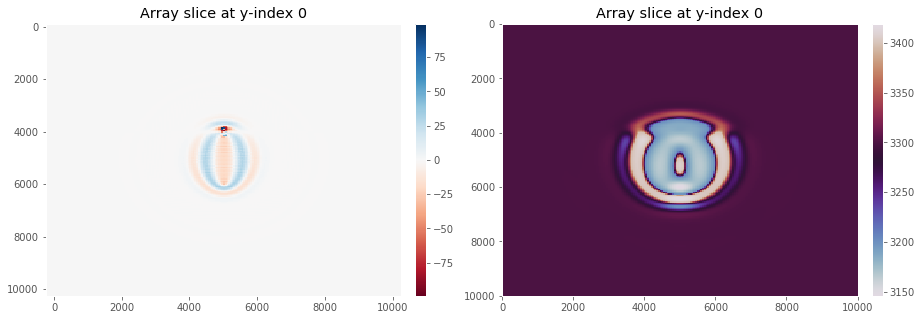

In [59]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,201), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo')
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[101,1,81], rec=[101,1,121])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.1)
f = FlowInvSyn('is02', './')
f.run([0,1], kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv, aspect='equal')
f.syn.i.sgn.time_integrate()
f.run(range(2,7), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv)

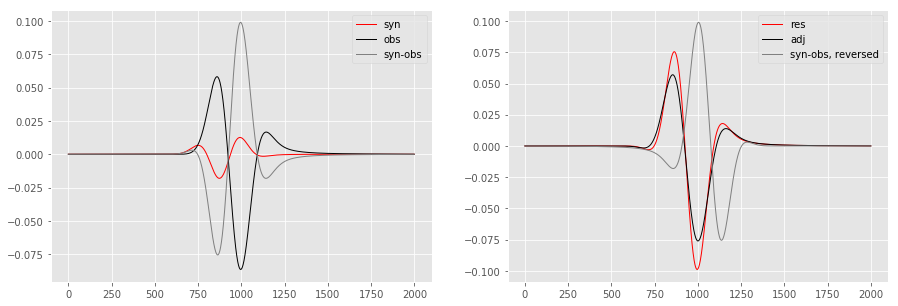

In [57]:
# code 
figure(15,5)
plt.subplot(121)
a = read_ttr('fis01inv/out/fis01inv-SLAVES_DUMPCOMPARE-csref00001-iter00001fwd1.ttr')
plt.plot(a[0,0,:], label='syn', c='r')
plt.plot(a[1,0,:], label='obs', c='k')
plt.plot(a[2,0,:], label='syn-obs', c='Grey')
plt.legend()
plt.grid()

plt.subplot(122)
res = read_ttr('fis01inv/out/fis01inv-SLAVES_DUMPRESIDS-csref00001-iter00001fwd2.ttr')[0,0,:]
adj = read_ttr('fis01inv/out/fis01inv-SLAVES_DUMPADJOINT-csref00001-iter00001.ttr')[0,0,:]
plt.plot(res, label='res', c='r')
plt.plot(adj, label='adj', c='k')
# plt.plot(a[2,0,:], label='diff', c='Grey')
plt.plot(a[2,0,:][::-1], label='syn-obs, reversed', c='Grey')
plt.legend()
plt.grid()

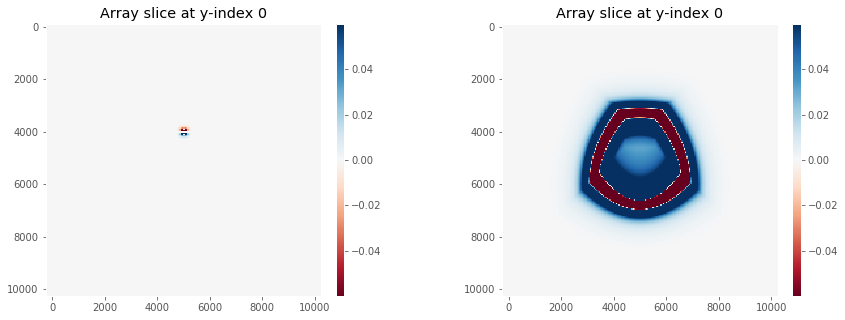

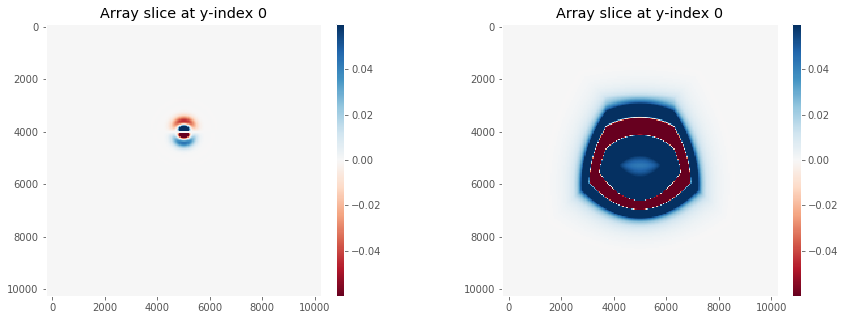

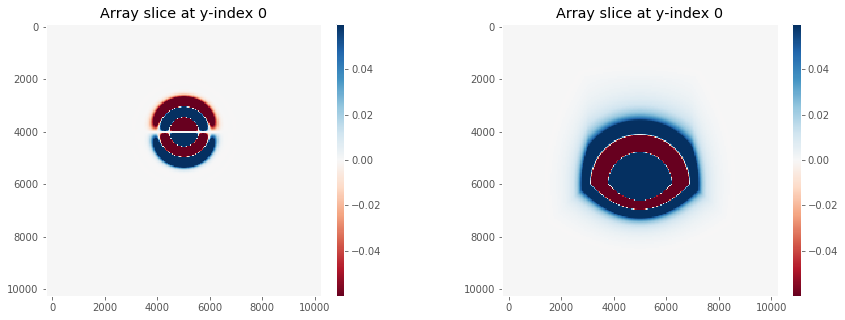

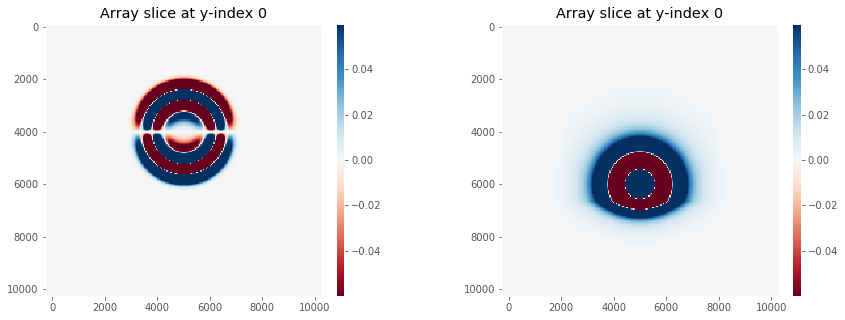

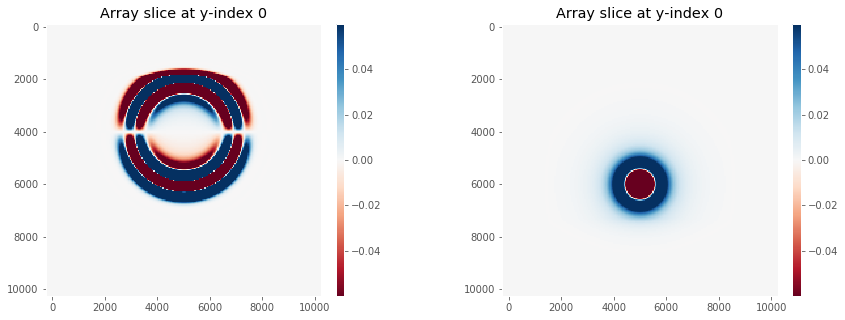

In [40]:
# code 
for i in range(100, 1000, 200):
    figure(15,5)
    plt.subplot(121)
    f.inv.o.fw.it[1][1][i].plot(overwrite=1, overwrite_mmp=1)
    plt.subplot(122)
    f.inv.o.bw.it[1][1][i].plot(overwrite=1, overwrite_mmp=1)    

#### Fig.
Gradient for a vertical dipole source and a monopole receiver. Note the reduced sensitivity to the structure along the direction orthogonal to the dipole axis.

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
Step 006: Plotting output of inversion.
CPU times: user 440 ms, sys: 404 ms, total: 844 ms
Wall time: 8.33 s


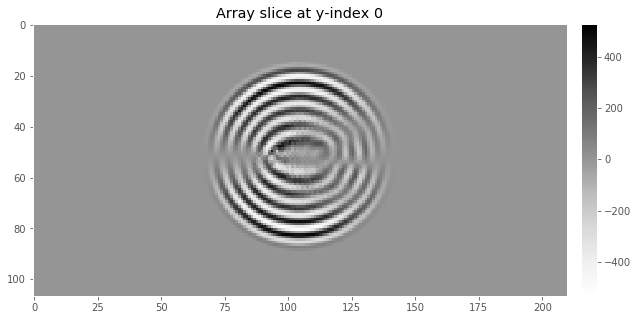

In [11]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None)

vp = 2000 # m/s
fpeak = 4 # Hz
kw_tvp = dict(kind='homo')
kw_fs  = None
kw_rsg = dict(kind='sine', fpeak=fpeak)
kw_pre = dict(acq='single', unit='n', src=[91,1,51], rec=[111,1,51])
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak} ])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='scaled_vp', avp=1.0001)
f = FlowInvSyn('fis01', './')
f.run([0,1], kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv)
f.syn.i.sgn.time_integrate()
f.run(range(2,7), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv)

#### Alg. 
p, ricker, multi src and rec

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
Step 006: Plotting output of inversion.
CPU times: user 244 ms, sys: 156 ms, total: 400 ms
Wall time: 21 s


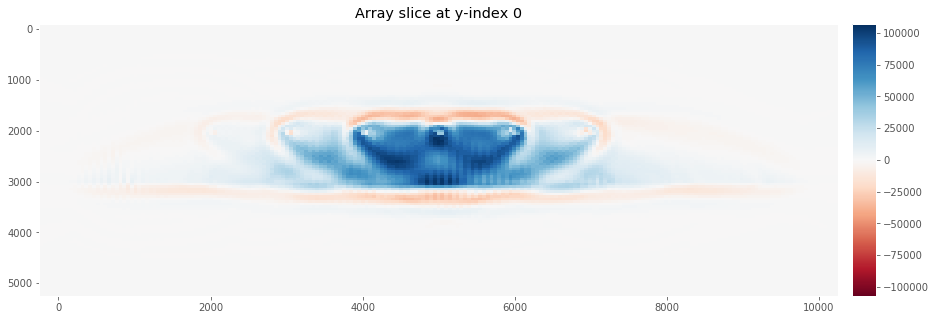

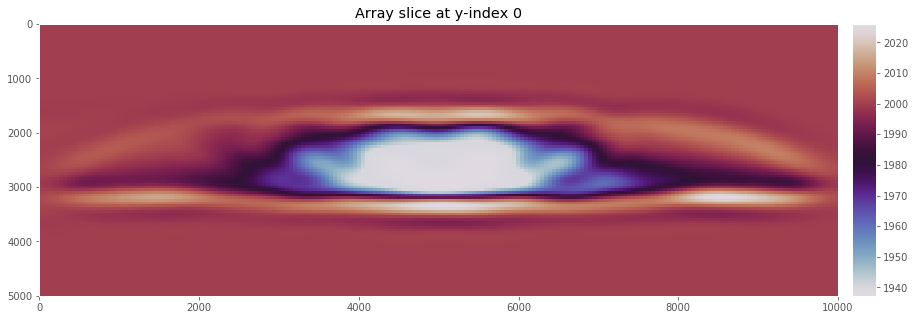

In [5]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690', ibmcode=None)

vp = 2000 # m/s
fpeak = 4
kw_tvp = dict(kind='sphere', bckd=vp, r=15, centre=(101,1,51), ampl=-.1)
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=fpeak)

kw_pre = dict(acq='regular', unit='n', sz=41, sx=np.arange(41,161,20), rz=61, rx=np.arange(1,202))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0, blocks=[{'nits': 1,'minoff': 0, 'freq': fpeak}])
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='homo', vp_homog=vp)

f = FlowInvSyn('fis01', './')
f.run(range(7), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv)

In [27]:
# figure(15,5)
# f.inv.o.grad.it[1].plot(aspect='equal')
# figure(15,5)
# f.inv.o.rawgrad.it[1].plot(aspect='equal')

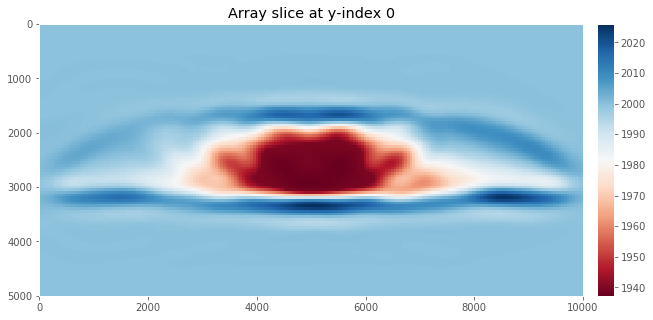

In [28]:
figure(15,5)
f.inv.o.vp.it[1].plot(aspect='equal', cmap='RdBu')

In [11]:
f.inv.o.e.no[0].cat()

Content of  .//fis01inv//out/fis01inv-Err0.log : 
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
 


In [9]:
%%time 
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100, exp=None,
           precode='sp-316', fwicode='fw3d-690', ibmcode=None)

vp = 2000 # m/s
kw_tvp = dict(kind='sphere', bckd=vp, r=15, centre=(101,1,51), ampl=-.1)
kw_fs  = None
kw_rsg = dict(kind='ricker', fpeak=4)

kw_pre = dict(acq='regular', unit='n', sz=41, sx=np.arange(41,161,20), rz=61, rx=np.arange(1,202))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
# This defines the difference between the inversion and synthetic input
kw_inv = dict(inv_vs_syn='homo', vp_homog=vp)

f = FlowInvSyn('fis01', './')
f.run(range(7), kw_tvp=kw_tvp, kw_fs=kw_fs, kw_rsg=kw_rsg, kw_pre=kw_pre, kw_rnf=kw_rnf,
      **kws, **kw_inv)

Step 000: Initialising synthetic and inversion projects.
Step 001: Preparing input for synthetic calculation.
Step 002: Running synthetic calculation.
Step 003: Plotting output of synthetic calculation.
Step 004: Preparing input for inversion.
Step 005: Running inversion.
Step 006: Plotting output of inversion.


FileNotFoundError: .//fis01inv//out/fis01inv-CP00001-Grad.vtr

<Figure size 1080x360 with 0 Axes>

In [ ]:
'fis01'

#### Fig. 
As above but array of receivers.

CPU times: user 196 ms, sys: 88 ms, total: 284 ms
Wall time: 3.63 s


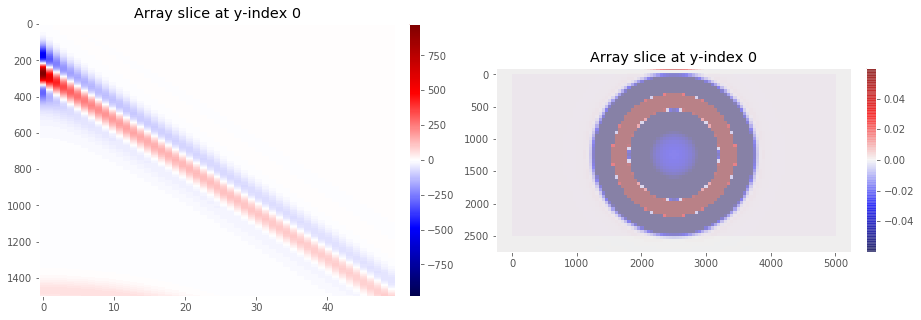

In [5]:
%%time
s01 = Syn(name='s01', path='./')
kws = dict(dt=1e-3, ns=1500, dx=50, dims=(101,1,51), snap=-100)
s01.init(**kws, precode='sp-316', fwicode='fw3d-690', ibmcode=None, exp=None)
s01.i.create(kw_tvp=dict(kind='homo', val=2e3), kw_rsg=dict(kind='ricker', fpeak=4), kw_fs=None)
kw_pre = dict(acq='regular', unit='n', src=[51,1,26], rz=26, rx=np.arange(101))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
s01.i.preprocess(**kw_pre, rnf=dict(kw_rnf))
s01.run(no=0)
!rm {s01.path} -r

#### Fig. 
As above but dipole source. It needs time-integral.

CPU times: user 132 ms, sys: 100 ms, total: 232 ms
Wall time: 4.15 s


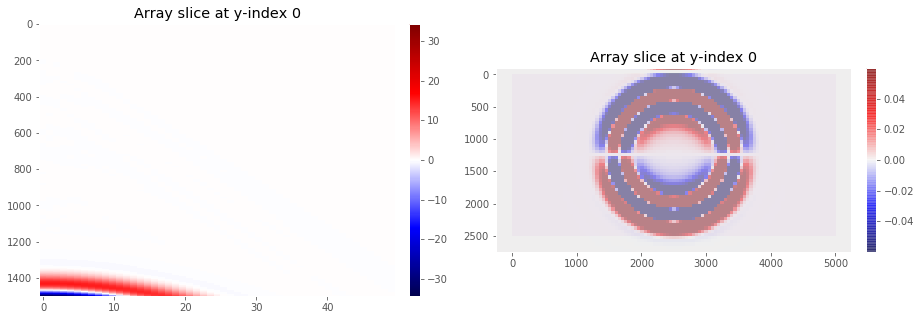

In [8]:
%%time
s01 = Syn(name='s01', path='./')
kws = dict(dt=1e-3, ns=1500, dx=50, dims=(101,1,51), snap=-100)
s01.init(**kws, precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None, exp=None)
s01.i.create(kw_tvp=dict(kind='homo', val=2e3), kw_rsg=dict(kind='ricker', fpeak=4), kw_fs=None)
kw_pre = dict(acq='regular', unit='n', src=[51,1,26], rz=26, rx=np.arange(101))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
s01.i.preprocess(**kw_pre, rnf=dict(kw_rnf))
s01.run(no=0)
!rm {s01.path} -r

#### Fig. 
As above but time-integrated.

CPU times: user 372 ms, sys: 420 ms, total: 792 ms
Wall time: 3.77 s


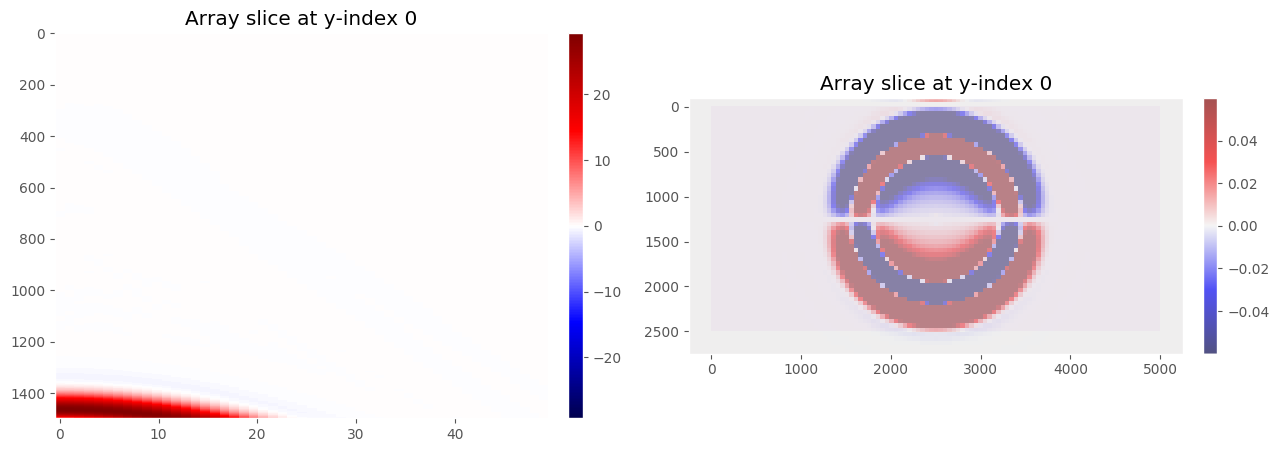

In [12]:
%%time
s01 = Syn(name='s01', path='./')
kws = dict(dt=1e-3, ns=1500, dx=50, dims=(101,1,51), snap=-100)
s01.init(**kws, precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None, exp=None)
s01.i.create(kw_tvp=dict(kind='homo', val=2e3), kw_rsg=dict(kind='ricker', fpeak=4), kw_fs=None)
kw_pre = dict(acq='regular', unit='n', src=[51,1,26], rz=26, rx=np.arange(101))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
s01.i.preprocess(**kw_pre, rnf=dict(kw_rnf))
s01.i.sgn.time_integrate()
s01.run(no=0)
!rm {s01.path} -r

In [10]:
# s01.o.syn.surange()

In [27]:
f.syn.i.r.cat()

Content of  .//is01syn//inp/is01syn-Receivers.geo : 
           1  10000.0000          0.0000       5000.0000
           1   4950.00000       0.00000000       2500.00000    
 


#### Fig.
p, ricker, multi src and rec. Weird backprop snapshots due to squaring.

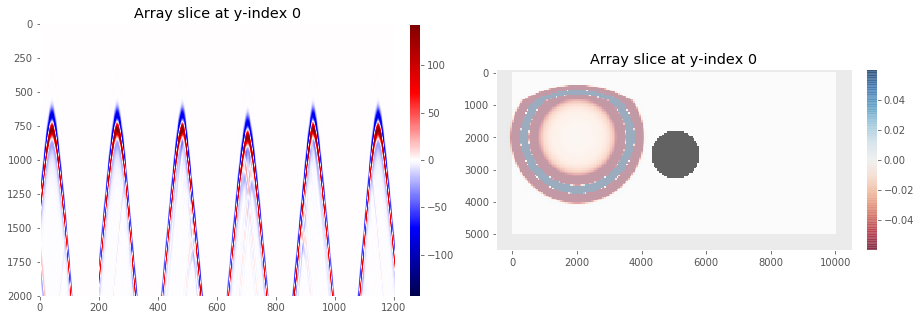

In [7]:
figure(15,5)
plt.subplot(121)
proj = f.syn
proj.o.syn.plot(overwrite_mmp=1)
proj.reinit()
its = sorted(proj.o.fw.it[1][1].keys())
it = its[10]
plt.subplot(122)
proj.i.tvp.plot(cmap='Greys_r', cbar=0, aspect='equal', overwrite_mmp=1)
proj.o.fw.it[1][1][it].plot(cmap='RdBu', overwrite_mmp=1, alpha=0.4)

In [7]:
f.syn.i.rnf.cat()

Content of  .//fis01syn//inp/fis01syn-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : synthetic
     domain        : time
     dim           : 2d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 201
     nx2           : 1
     nx3           : 101
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 6
     nshots        : 6
     nrecs         : 201
     maxrc         : 201
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     ibfs          : 0
     multisurf     : 0
     nosprdfctrs   : 0     
     seaLevel      : 0
     maxGhostIter  : 2
     vacuum        : 0
     accuracy      : 0.001
     minGhostFS    : 0.001
     minFictFS     : 0.5
     interpMode    : 1     
     
  

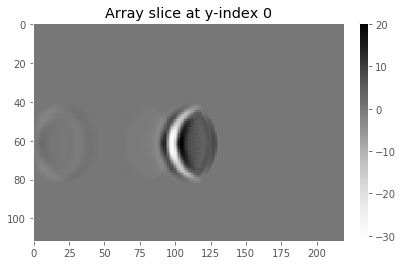

In [27]:
a = A3d(read_vtr('fis01inv/out/fis01inv-bw-001500-csref00001-iter00001fwd1.vtr', shape=proj.o.fw.it[1][1][it].read().shape))
a.plot(0)

In [31]:
# proj.env.var

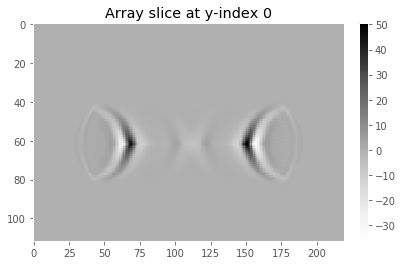

In [28]:
a = A3d(read_vtr('fis01inv/out/fis01inv-bw-001500-csref00004-iter00001fwd1.vtr', shape=proj.o.fw.it[1][1][it].read().shape))
a.plot(0)

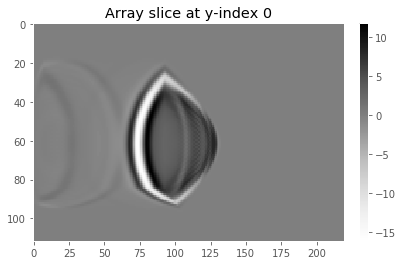

In [22]:
a = A3d(read_vtr('fis01inv/out/fis01inv-bw-000900-csref00001-iter00001fwd1.vtr', shape=proj.o.fw.it[1][1][it].read().shape))
a.plot(0)

#### Alg. 
vz, ricker, multi src and rec

CPU times: user 776 ms, sys: 516 ms, total: 1.29 s
Wall time: 18.8 s


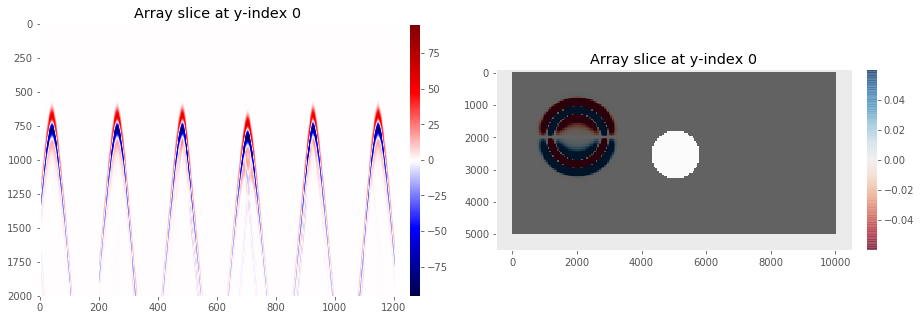

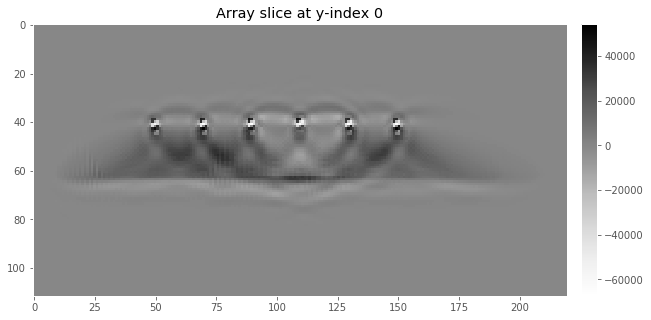

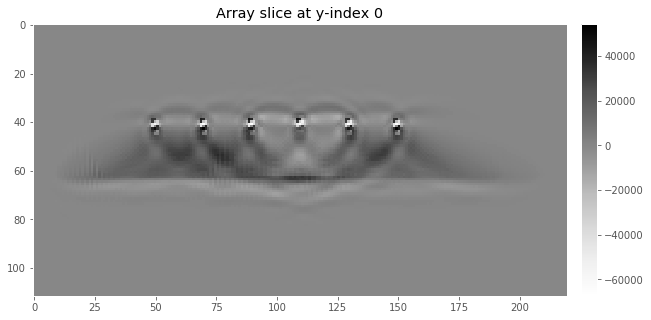

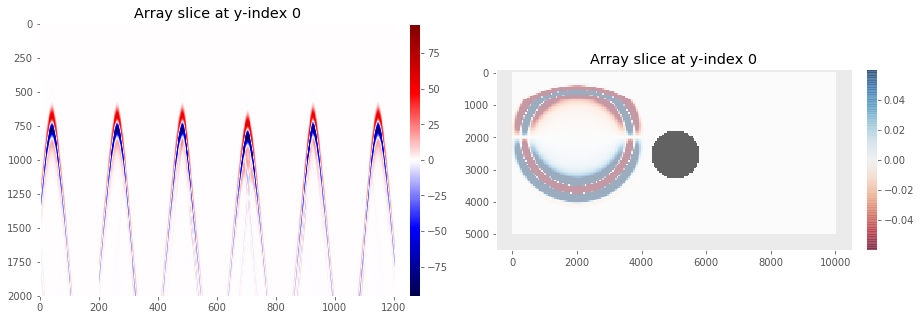

In [6]:
%%time
f = FlowInvSyn('fis01', './')
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100,
           precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None, exp=None)
f.init(**kws)
# kw_pre = dict(acq='regular', unit='n', src=[101,1,51], rz=51, rx=np.arange(1,202))
kw_pre = dict(acq='regular', unit='n', sz=41, sx=np.arange(41,161,20), rz=61, rx=np.arange(1,202))
# kw_pre = dict(acq='regular', unit='n', sz=51, sx=np.array([81,121]), rz=91, rx=np.arange(1,202))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
vp = 2e3
f.run([1], kw_tvp=dict(kind='sphere', bckd=vp, r=15, centre=(101,1,51), ampl=-.1),
      kw_rsg=dict(kind='ricker', fpeak=4), kw_fs=None,
      kw_pre=kw_pre, kw_rnf=kw_rnf)
f.syn.i.sgn.time_integrate()
f.run([2,3,4,5], inv_vs_syn='homo', vp_homog=vp)
figure(15,5)
plt.subplot(121)
proj = f.syn
proj.o.syn.plot(overwrite_mmp=1)
proj.reinit()
its = sorted(proj.o.fw.it[1][1].keys())
it = its[10]
plt.subplot(122)
proj.i.tvp.plot(cmap='Greys_r', cbar=0, aspect='equal', overwrite_mmp=1)
proj.o.fw.it[1][1][it].plot(cmap='RdBu', overwrite_mmp=1, alpha=0.4)

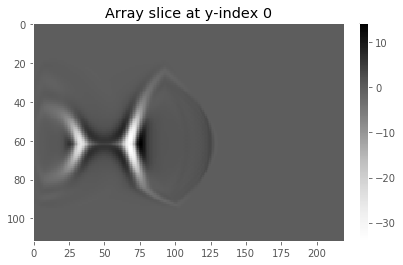

In [20]:
a = A3d(read_vtr('fis01inv/out/fis01inv-bw-000900-csref00001-iter00001fwd1.vtr', shape=proj.o.fw.it[1][1][it].read().shape))
a.plot(0)

#### Alg. 
p, sine

CPU times: user 184 ms, sys: 152 ms, total: 336 ms
Wall time: 9.41 s


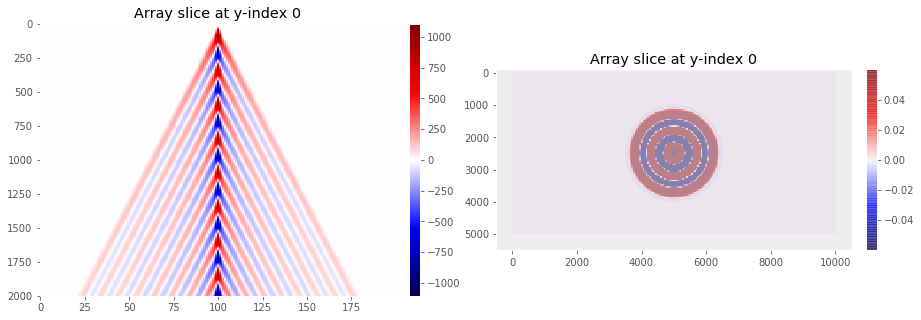

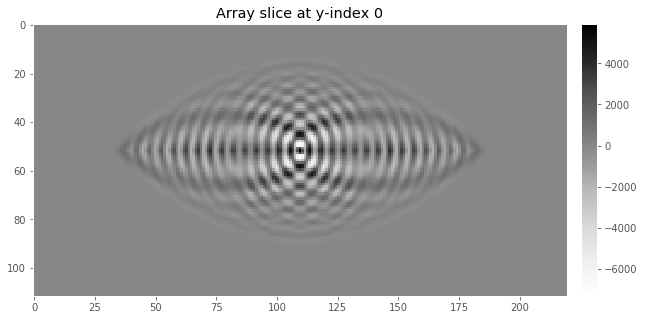

In [21]:
%%time
f = FlowInvSyn('fis01', './')
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100,
           precode='sp-316', fwicode='fw3d-690', ibmcode=None, exp=None)
f.init(**kws)
kw_pre = dict(acq='regular', unit='n', src=[101,1,51], rz=51, rx=np.arange(1,202))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
f.run([1], kw_tvp=dict(kind='homo', val=2e3), kw_rsg=dict(kind='sine', fpeak=4), kw_fs=None,
      kw_pre=kw_pre, kw_rnf=kw_rnf)
f.run([2,3,4,5], avp=1.001)

#### Alg. 
vz, ricker.

CPU times: user 200 ms, sys: 208 ms, total: 408 ms
Wall time: 10.2 s


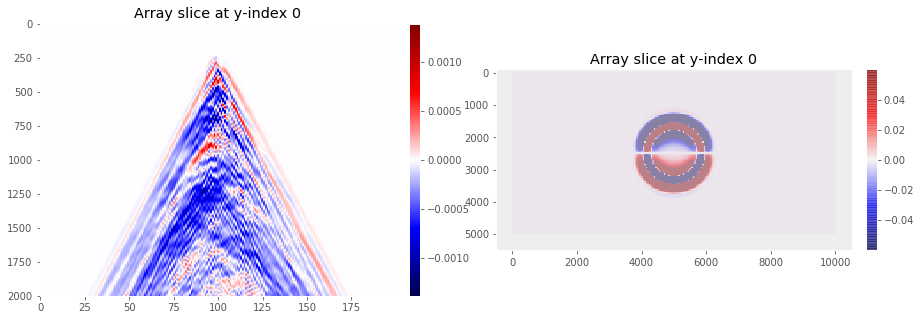

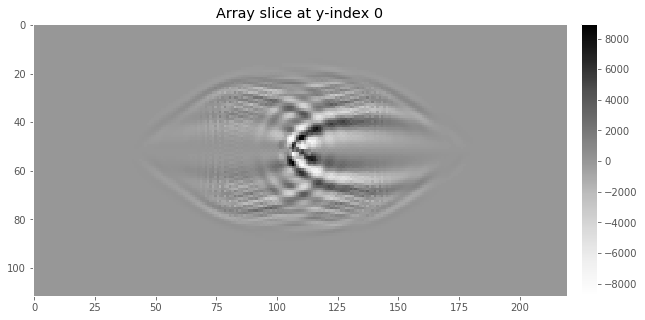

In [17]:
%%time
f = FlowInvSyn('fis01', './')
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100,
           precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None, exp=None)
f.init(**kws)
kw_pre = dict(acq='regular', unit='n', src=[101,1,51], rz=51, rx=np.arange(1,202))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
f.run([1], kw_tvp=dict(kind='homo', val=2e3), kw_rsg=dict(kind='ricker', fpeak=4), kw_fs=None,
      kw_pre=kw_pre, kw_rnf=kw_rnf)
f.syn.i.sgn.time_integrate()
f.run([2,3,4,5], avp=1.001)

#### Alg. 
vz, sine.

CPU times: user 196 ms, sys: 152 ms, total: 348 ms
Wall time: 9.86 s


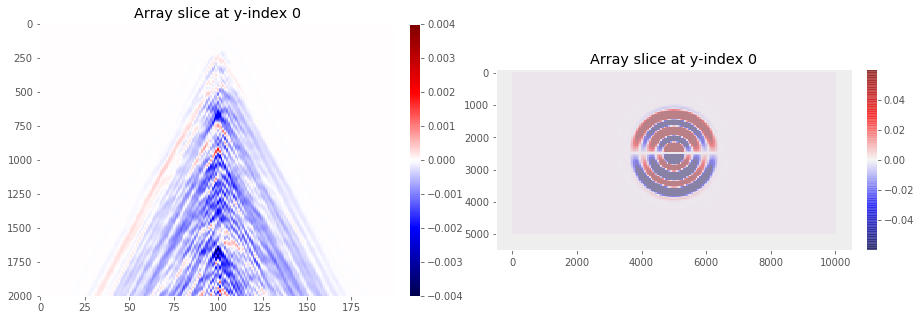

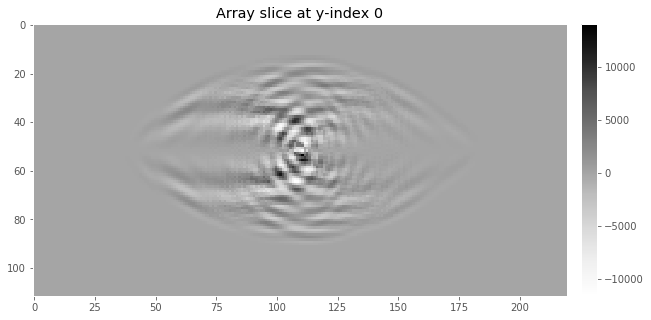

In [22]:
%%time
f = FlowInvSyn('fis01', './')
kws = dict(dt=1e-3, ns=2000, dx=50, dims=(201,1,101), snap=-100,
           precode='sp-316', fwicode='fw3d-690-p2v', ibmcode=None, exp=None)
f.init(**kws)
kw_pre = dict(acq='regular', unit='n', src=[101,1,51], rz=51, rx=np.arange(1,202))
kw_rnf = dict(b_abs=5, e_abs=5, ibfs=0, vacuum=0, cat=0)
f.run([1], kw_tvp=dict(kind='homo', val=2e3), kw_rsg=dict(kind='sine', fpeak=4), kw_fs=None,
      kw_pre=kw_pre, kw_rnf=kw_rnf)
f.syn.i.sgn.time_integrate()
f.run([2,3,4,5], avp=1.001)

# ... 